# POKEMON CLASSIFIER

In [1]:
!pip install xgboost

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Preprocessing

In [29]:
df = pd.read_csv("pokemon_data.csv")
print(df.head())

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


In [30]:
df.shape

(800, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [32]:
df.groupby('Legendary').size()

Legendary
False    735
True      65
dtype: int64

In [33]:
df[df['Legendary']==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [34]:
X = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = df.Legendary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [35]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X_train: (600, 6)
Shape of X_test: (200, 6)
Shape of y_train: (600,)
Shape of y_test: (200,)
Shape of X: (800, 6)
Shape of y: (800,)


## Random forest model

In [66]:
model = RandomForestClassifier(max_leaf_nodes=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10)

In [68]:
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy Score:", model_accuracy)
print("Random Forest accuracy:", model_accuracy)

Accuracy Score: 0.935
Random Forest accuracy: 0.935


In [69]:
print('ROC_AUC_Score', roc_auc_score(y_test, predictions))

ROC_AUC_Score 0.6443265830922533


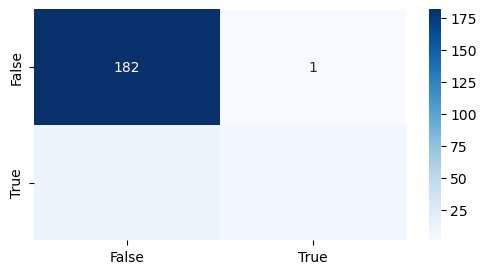

In [70]:
true_labels = y_test
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6,3))
heatmap = sns.heatmap(conf_matrix, annot=True, cmap = 'Blues', fmt='g', xticklabels=np.unique(true_labels),
                      yticklabels=np.unique(true_labels))

In [71]:
normal = [[490,75,110,105,30,70]]
legen = [[156,157,158,162,163,795]]

print("Normal Pokemon",model.predict(normal))
print("Legendary Pokemon",model.predict(legen))

Normal Pokemon [False]
Legendary Pokemon [ True]


C:\Users\vishn\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Feature importance for a legendary pokemon


Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       183
        True       0.83      0.29      0.43        17

    accuracy                           0.94       200
   macro avg       0.89      0.64      0.70       200
weighted avg       0.93      0.94      0.92       200



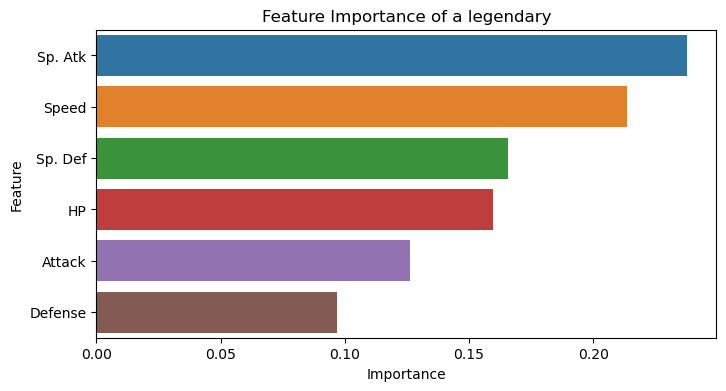

In [97]:
print('\nClassification Report:')
print(classification_report(y_test, predictions))

# Feature importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance of a legendary')
plt.show()

## XGBoostClassifier and AdaBoostClassifier with hyperparameter tuning

In [73]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 3, 5]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, cv=3, scoring='accuracy', verbose=1)
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


C:\Users\vishn\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vishn\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vishn\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vishn\anaconda3\lib\site-packages\

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [74]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best score for XGBoost:", xgb_grid_search.best_score_)

# Make predictions with the best XGBoost model
xgb_best_clf = xgb_grid_search.best_estimator_

Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best score for XGBoost: 0.9566666666666666


In [75]:
xgb_y_pred = xgb_best_clf.predict(X_test)

In [76]:
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')
print('XGBoost Classification Report:')
print(classification_report(y_test, xgb_y_pred))

XGBoost Accuracy: 0.95
XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       183
        True       0.77      0.59      0.67        17

    accuracy                           0.95       200
   macro avg       0.87      0.79      0.82       200
weighted avg       0.95      0.95      0.95       200



In [77]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'base_estimator__min_samples_split': [2, 5, 10],
}
base_estimator = DecisionTreeClassifier(max_depth=1)  
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)
ada_grid_search = GridSearchCV(estimator=ada_clf, param_grid=ada_param_grid, cv=3, scoring='accuracy', verbose=1)
ada_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


C:\Users\vishn\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-p

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [86]:
print("Best parameters for AdaBoost:", ada_grid_search.best_params_)
print("Best score for AdaBoost:", ada_grid_search.best_score_)

ada_best_clf = ada_grid_search.best_estimator_
ada_y_pred = ada_best_clf.predict(X_test)

Best parameters for AdaBoost: {'base_estimator__max_depth': 1, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 50}
Best score for AdaBoost: 0.9483333333333334


In [87]:
ada_accuracy = accuracy_score(y_test, ada_y_pred)
print(f'AdaBoost Accuracy: {ada_accuracy:.2f}')
print('AdaBoost Classification Report:')
print(classification_report(y_test, ada_y_pred))

AdaBoost Accuracy: 0.93
AdaBoost Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       183
        True       0.71      0.29      0.42        17

    accuracy                           0.93       200
   macro avg       0.83      0.64      0.69       200
weighted avg       0.92      0.93      0.92       200



## Comparing Random forest, XGboost and Adaboost classsifiers

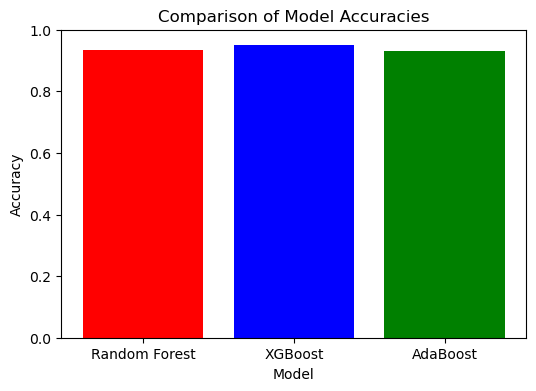

In [88]:
models = ['Random Forest', 'XGBoost', 'AdaBoost']
accuracies = [model_accuracy, xgb_accuracy, ada_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['red', 'blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()

## Neural Network Model

In [89]:
# converting the target varibales to categorical variables
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [90]:
# Initialize the neural network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))  # 2 classes for the 'Legendary' column, either 'True' or 'False'

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
history = nn_model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30


C:\Users\vishn\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8305 - loss: 2.1554 - val_accuracy: 0.9083 - val_loss: 0.7239
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8292 - loss: 0.8374 - val_accuracy: 0.8667 - val_loss: 0.4535
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8814 - loss: 0.4969 - val_accuracy: 0.9167 - val_loss: 0.3546
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.3907 - val_accuracy: 0.9500 - val_loss: 0.2941
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.4718 - val_accuracy: 0.9583 - val_loss: 0.3624
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.5566 - val_accuracy: 0.8917 - val_loss: 0.3397
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4118 - val_accuracy: 0.9500 - val_loss: 0.2870
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9072 - loss: 0.3401 - val_accuracy: 0.8667 - val_loss: 0.3592
Ep

In [91]:
# evaluating the nn model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Neural Network Accuracy: {nn_accuracy:.2f}')

Neural Network Accuracy: 0.91


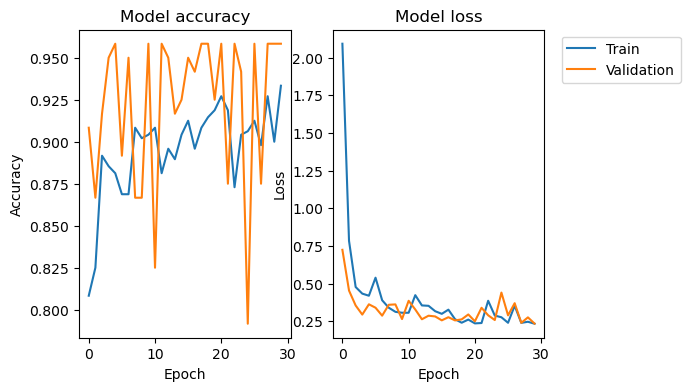

In [92]:
plt.figure(figsize=(6, 4))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'],bbox_to_anchor=(1.05, 1.0),loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'],bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()


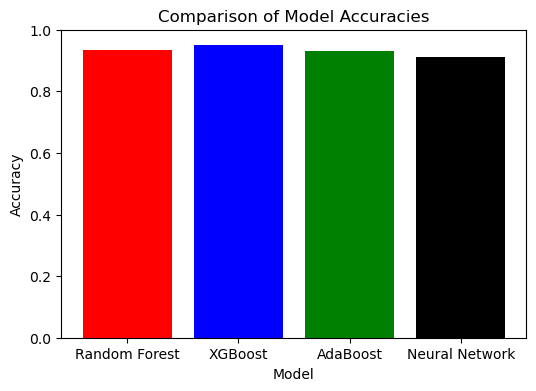

In [94]:
models = ['Random Forest', 'XGBoost', 'AdaBoost', 'Neural Network']
accuracies = [model_accuracy, xgb_accuracy, ada_accuracy, nn_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['red', 'blue', 'green','black'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()